In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_frame = pd.read_csv("/content/drive/MyDrive/Avocado Dataset/avocado.csv")
data_frame

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# **Data Cleaning**

In [6]:
data_frame = data_frame.drop(['Unnamed: 0'], axis=1)

# Check for missing values
print(data_frame.isnull().sum())

# Check for duplicates
print(data_frame.duplicated().sum())


Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
0


No missing values and duplicates.

# **Data Transformation**

In [7]:
data_frame['Date'] = pd.to_datetime(data_frame['Date'])

# Create a new column for the year
data_frame['year'] = data_frame['Date'].dt.year

# Encode the type column as a categorical variable
data_frame['type'] = data_frame['type'].astype('category').cat.codes

data_frame.reset_index(inplace = True)
data_frame


,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  int8          
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), int8(1), object(1)
memory usage: 1.8+ MB


In [9]:
data_frame.describe(include="all")

<ipython-input-9-59d4217a7bca>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_frame.describe(include="all")


,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249
unique,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
top,NaN,2015-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338
first,NaN,2015-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-03-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9124.000000,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,NaN
std,5268.176867,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,NaN
min,0.000000,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,NaN
25%,4562.000000,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,NaN


Data is not normalized hence, normalize the data.

# **Data Normalization**

In [10]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the selected features
scaler.fit(data_frame[features_to_normalize])

# Transform the selected features
data_frame[features_to_normalize] = scaler.transform(data_frame[features_to_normalize])

# View the normalized dataset
data_frame

,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0,2015,Albany
1,1,2015-12-20,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0,2015,Albany
2,2,2015-12-13,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0,2015,Albany
3,3,2015-12-06,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0,2015,Albany
4,4,2015-11-29,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,18244,2018-02-04,0.423488,0.000272,0.000090,0.000075,0.000000,0.000697,0.000976,0.000076,0.0,1,2018,WestTexNewMexico
18245,18245,2018-01-28,0.451957,0.000221,0.000052,0.000168,0.000000,0.000478,0.000668,0.000057,0.0,1,2018,WestTexNewMexico
18246,18246,2018-01-21,0.508897,0.000219,0.000052,0.000120,0.000286,0.000485,0.000699,0.000007,0.0,1,2018,WestTexNewMexico
18247,18247,2018-01-14,0.530249,0.000258,0.000067,0.000146,0.000286,0.000566,0.000816,0.000009,0.0,1,2018,WestTexNewMexico


In [11]:
data_frame.describe(include="all")


<ipython-input-11-59d4217a7bca>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_frame.describe(include="all")


,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249
unique,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
top,NaN,2015-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338
first,NaN,2015-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-03-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9124.000000,NaN,0.343765,0.013608,0.012883,0.014418,0.008969,0.012370,0.013612,0.009501,0.005631,0.499918,2016.147899,NaN
std,5268.176867,NaN,0.143301,0.055252,0.055620,0.058822,0.042202,0.050908,0.055749,0.042658,0.032070,0.500014,0.939938,NaN
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,NaN
25%,4562.000000,NaN,0.234875,0.000172,0.000038,0.000147,0.000000,0.000263,0.000213,0.000022,0.000000,0.000000,2015.000000,NaN


Data is normalized now.

In [12]:
med = data_frame.median()
med

<ipython-input-12-633a2631120e>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  med = data_frame.median()
<ipython-input-12-633a2631120e>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med = data_frame.median()


index           9124.000000
AveragePrice       0.330961
Total Volume       0.001717
4046               0.000380
4225               0.001420
4770               0.000073
Total Bags         0.002051
Small Bags         0.001970
Large Bags         0.000463
XLarge Bags        0.000000
type               0.000000
year            2016.000000
dtype: float64

In [13]:

var = data_frame.var()
var

<ipython-input-13-306e5e2ca777>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  var = data_frame.var()


index           2.775369e+07
AveragePrice    2.053525e-02
Total Volume    3.052762e-03
4046            3.093531e-03
4225            3.460030e-03
4770            1.780984e-03
Total Bags      2.591598e-03
Small Bags      3.107961e-03
Large Bags      1.819716e-03
XLarge Bags     1.028494e-03
type            2.500137e-01
year            8.834843e-01
dtype: float64

# **Data Validation**

In [14]:
# Check for accuracy
print(data_frame['AveragePrice'].describe()) # check if the average price is within a reasonable range

# Check for completeness
print(data_frame.isnull().sum()) # check for missing values in each column

# Check for consistency
print(data_frame['region'].unique()) # check that the same regions are represented consistently throughout the dataset
print(data_frame['Total Volume'].sum() == data_frame[['Small Bags', 'Large Bags', 'XLarge Bags']].sum().sum()) # check that the total volume sold is consistent with the sum of volumes sold in each category

count    18249.000000
mean         0.343765
std          0.143301
min          0.000000
25%          0.234875
50%          0.330961
75%          0.434164
max          1.000000
Name: AveragePrice, dtype: float64
index           0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreen

# **Covariance Matrix**

In [15]:
cov_Data = data_frame.cov()
cov_Data

<ipython-input-15-8d66ca826bde>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_Data = data_frame.cov()


,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
index,2.775369e+07,438.150967,-49.016881,-48.861099,-57.303593,-41.195438,-34.822794,-40.294852,-22.000765,-17.169376,2281.249945,2352.586694
AveragePrice,4.381510e+02,0.020535,-0.001526,-0.001660,-0.001458,-0.001085,-0.001292,-0.001396,-0.001057,-0.000540,0.044127,0.012553
Total Volume,-4.901688e+01,-0.001526,0.003053,0.003005,0.003166,0.002034,0.002709,0.002979,0.002076,0.001324,-0.006421,0.000893
4046,-4.886110e+01,-0.001660,0.003005,0.003094,0.003030,0.001956,0.002605,0.002869,0.001990,0.001247,-0.006280,0.000175
4225,-5.730359e+01,-0.001458,0.003166,0.003030,0.003460,0.002204,0.002712,0.003004,0.002033,0.001299,-0.006832,-0.000529
4770,-4.119544e+01,-0.001085,0.002034,0.001956,0.002204,0.001781,0.001702,0.001889,0.001257,0.000920,-0.004432,-0.001449
Total Bags,-3.482279e+01,-0.001292,0.002709,0.002605,0.002712,0.001702,0.002592,0.002822,0.002048,0.001313,-0.005544,0.003424
Small Bags,-4.029485e+01,-0.001396,0.002979,0.002869,0.003004,0.001889,0.002822,0.003108,0.002146,0.001443,-0.006147,0.003349
Large Bags,-2.200076e+01,-0.001057,0.002076,0.001990,0.002033,0.001257,0.002048,0.002146,0.001820,0.000972,-0.004120,0.003524
XLarge Bags,-1.716938e+01,-0.000540,0.001324,0.001247,0.001299,0.000920,0.001313,0.001443,0.000972,0.001028,-0.002814,0.002443


# **Dimensionality Reduction**

In [16]:
from scipy import linalg
from sklearn.preprocessing import StandardScaler
import numpy as np

df = data_frame.drop("Date", axis = 1)
df = df.drop("index", axis = 1)
df = df.drop("region", axis = 1)

#mean of each column
M=df.mean()

#center columns by subtracting mean
C= df-M

# Compute the covariance matrix
cov_matrix = np.cov(C.T)
cov_matrix

#calculate eigen vectors and values
eigen_values, eigen_vectors = linalg.eig(cov_matrix)
print(eigen_values)
print(eigen_vectors)

#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]

#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]


X_reduced = np.dot(eigenvector_subset.transpose() , C.transpose() ).transpose()
X_reduced

df = pd.DataFrame(X_reduced,columns=["PC1","PC2"])
df

[8.83717711e-01+0.j 2.59249507e-01+0.j 1.71423897e-02+0.j
 1.20398254e-02+0.j 7.75948749e-04+0.j 4.61199494e-04+0.j
 2.01764852e-04+0.j 1.10758065e-04+0.j 2.69240238e-04+0.j
 4.85837031e-13+0.j 7.04202830e-18+0.j]
[[-1.45684991e-02 -1.82186521e-01 -1.47588828e-01 -9.71748707e-01
  -3.62412608e-03 -1.11483225e-02 -1.92175953e-02  3.32860266e-03
  -6.39079996e-05 -6.47115871e-08 -1.02608574e-11]
 [-1.01516194e-03  2.72638067e-02  4.03082889e-01 -6.56420702e-02
   1.09945644e-01 -1.36440985e-01  1.25941103e-02 -6.99123978e-02
  -1.14126567e-01 -8.85265803e-01 -3.64770805e-06]
 [-1.99848320e-04  2.67680273e-02  3.94492845e-01 -5.09456373e-02
   1.55816056e-01 -3.27919806e-01 -5.61333281e-01 -9.67827038e-02
  -5.30124892e-01  3.22116411e-01  1.32470697e-06]
 [ 5.92859817e-04  2.88101414e-02  4.13126191e-01 -8.19772934e-02
   4.18890237e-01 -1.03931923e-01  6.08684620e-01 -4.10701844e-01
   1.10798638e-01  2.89923979e-01  1.19649158e-06]
 [ 1.63968915e-03  1.87790902e-02  2.70415496e-01 -4.3

,PC1,PC2
0,1.148723,0.489596
1,1.148619,0.488284
2,1.150798,0.515629
3,1.150021,0.505827
4,1.148984,0.492809
...,...,...
18244,-1.853317,-0.501248
18245,-1.853729,-0.506448
18246,-1.854558,-0.516818
18247,-1.854870,-0.520700



---

# **Visualization**


---



# **Univariate Analysis**

<ipython-input-17-486141970b8b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(221)


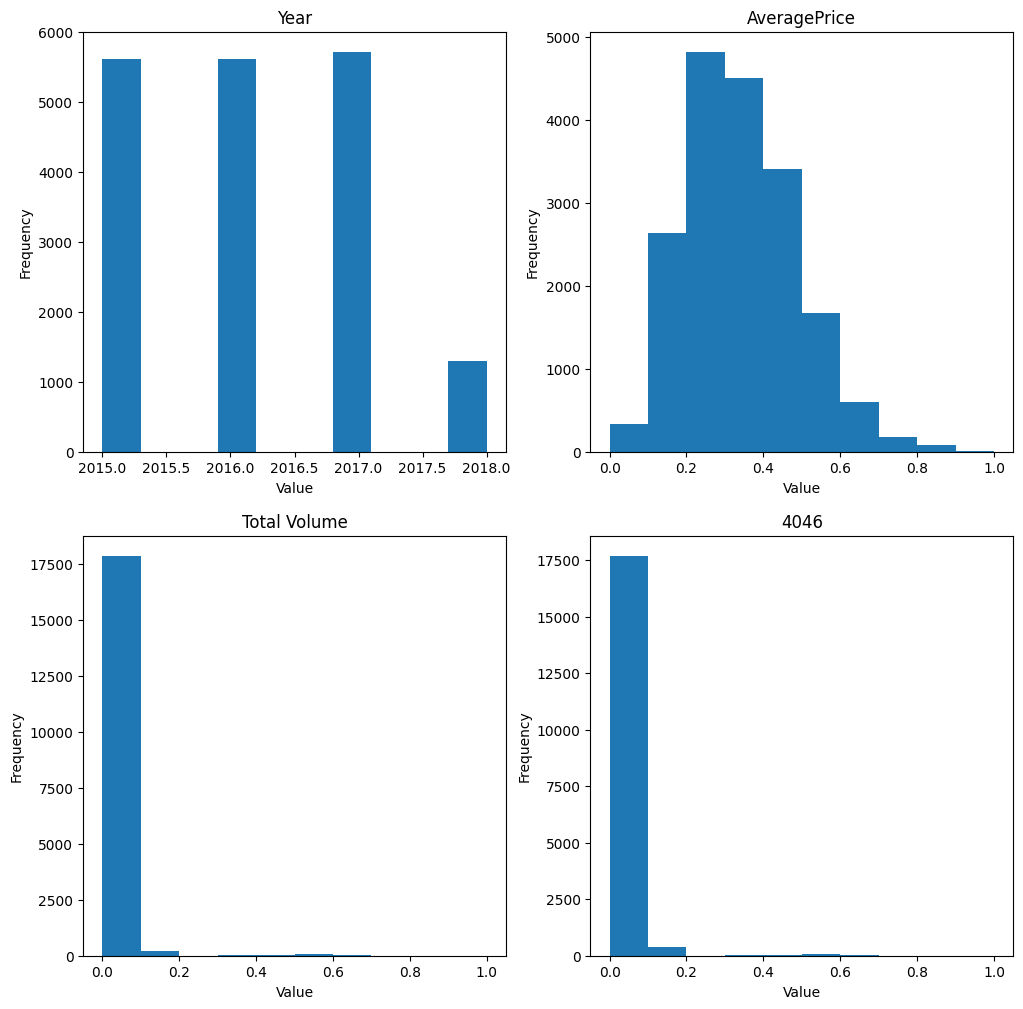

In [17]:
fig = plt.figure(figsize=(12,12))
# Create a histogram with 10 bins
plt.hist(data_frame["Date"])

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

# Show the plot
ax1.hist(data_frame["year"])
ax2.hist(data_frame["AveragePrice"])
ax3.hist(data_frame["Total Volume"])
ax4.hist(data_frame["4046"])

# Add labels and title
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Year')

ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('AveragePrice')

ax3.set_xlabel('Value')
ax3.set_ylabel('Frequency')
ax3.set_title('Total Volume')

ax4.set_xlabel('Value')
ax4.set_ylabel('Frequency')
ax4.set_title('4046')

# Show the plot
plt.show()

<ipython-input-18-bf77a4cd824f>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(221)


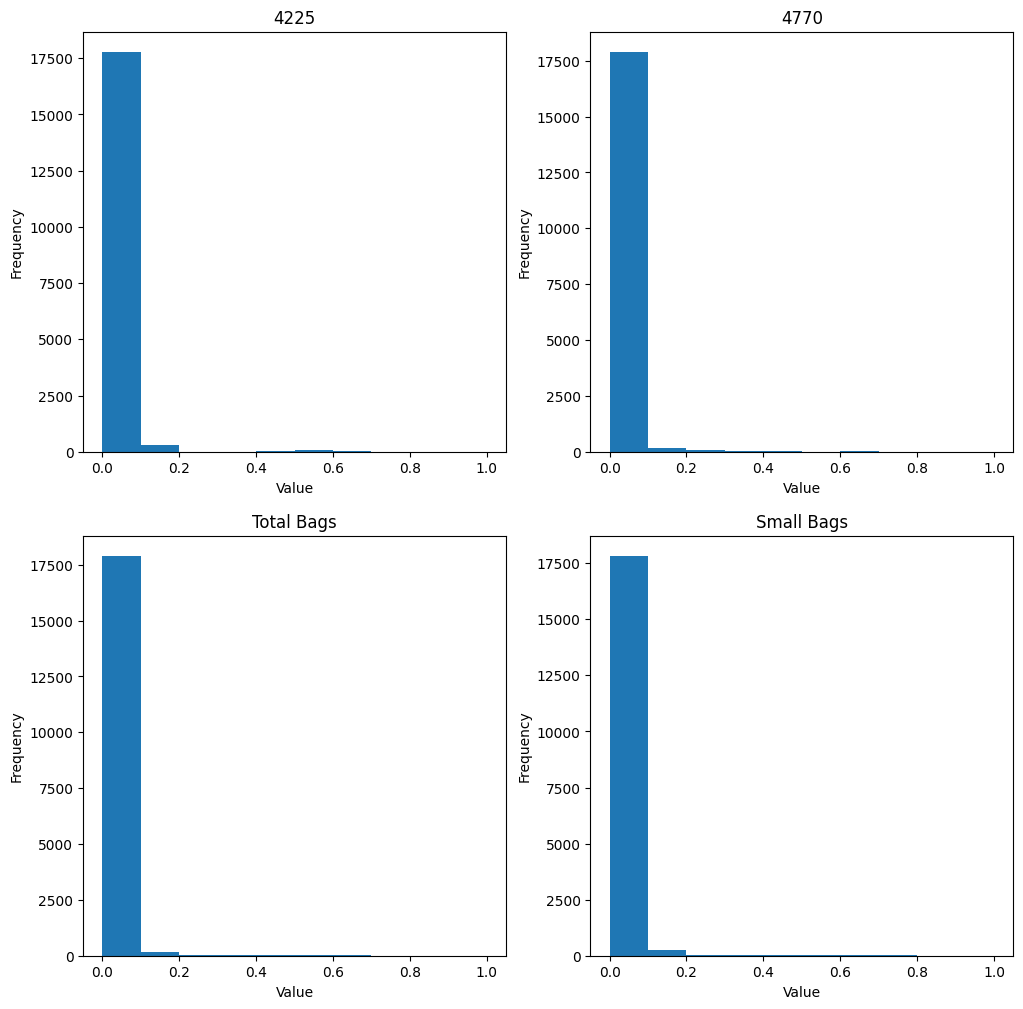

In [18]:
fig = plt.figure(figsize=(12,12))
# Create a histogram with 10 bins
plt.hist(data_frame["Date"])

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

# Show the plot
ax1.hist(data_frame["4225"])
ax2.hist(data_frame["4770"])
ax3.hist(data_frame["Total Bags"])
ax4.hist(data_frame["Small Bags"])

# Add labels and title
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('4225')

ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('4770')

ax3.set_xlabel('Value')
ax3.set_ylabel('Frequency')
ax3.set_title('Total Bags')

ax4.set_xlabel('Value')
ax4.set_ylabel('Frequency')
ax4.set_title('Small Bags')

# Show the plot
plt.show()

<ipython-input-19-70c0ee099775>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(221)


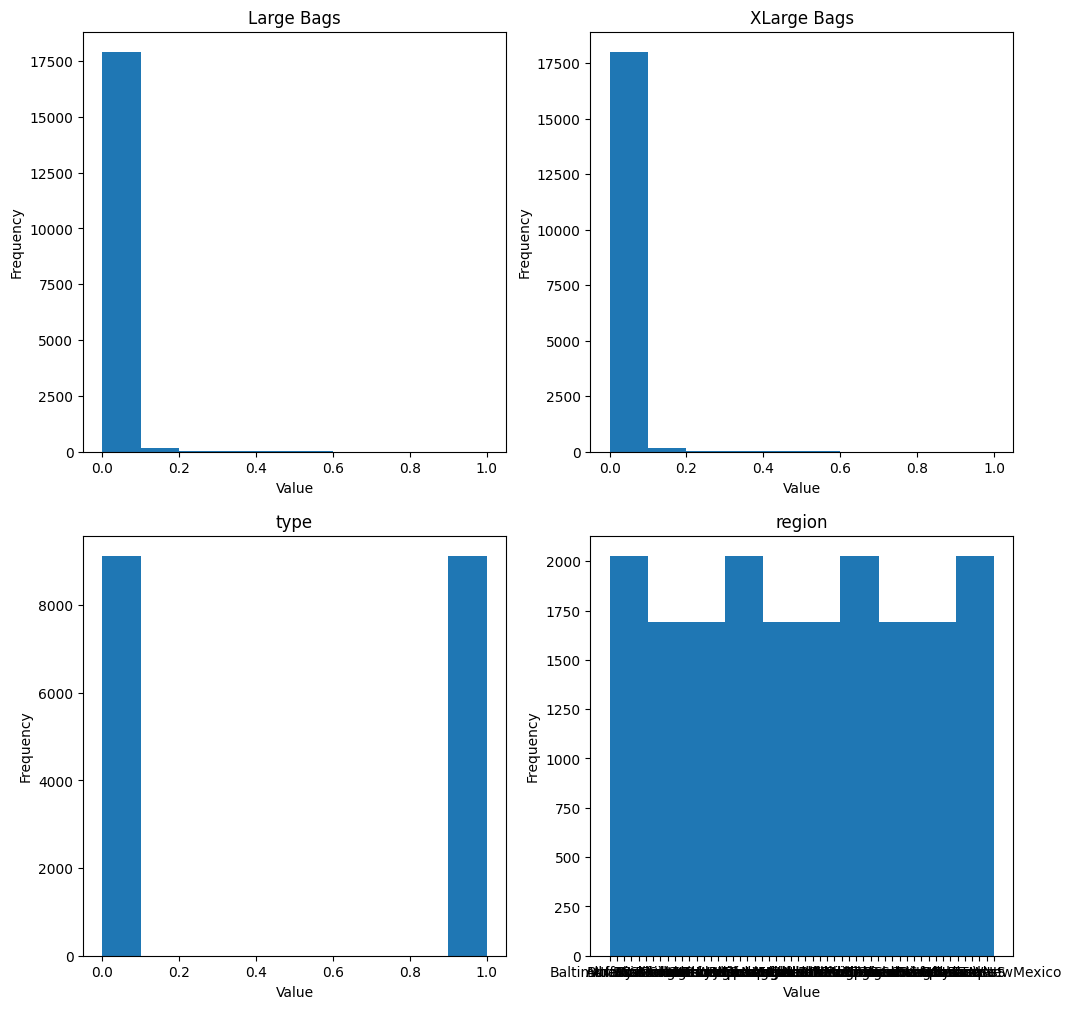

In [19]:
fig = plt.figure(figsize=(12,12))
# Create a histogram with 10 bins
plt.hist(data_frame["Date"])

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

# Show the plot
ax1.hist(data_frame["Large Bags"])
ax2.hist(data_frame["XLarge Bags"])
ax3.hist(data_frame["type"])
ax4.hist(data_frame["region"])

# Add labels and title
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Large Bags')

ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('XLarge Bags')

ax3.set_xlabel('Value')
ax3.set_ylabel('Frequency')
ax3.set_title('type')

ax4.set_xlabel('Value')
ax4.set_ylabel('Frequency')
ax4.set_title('region')

# Show the plot
plt.show()

# **Bivairiate Analysis**

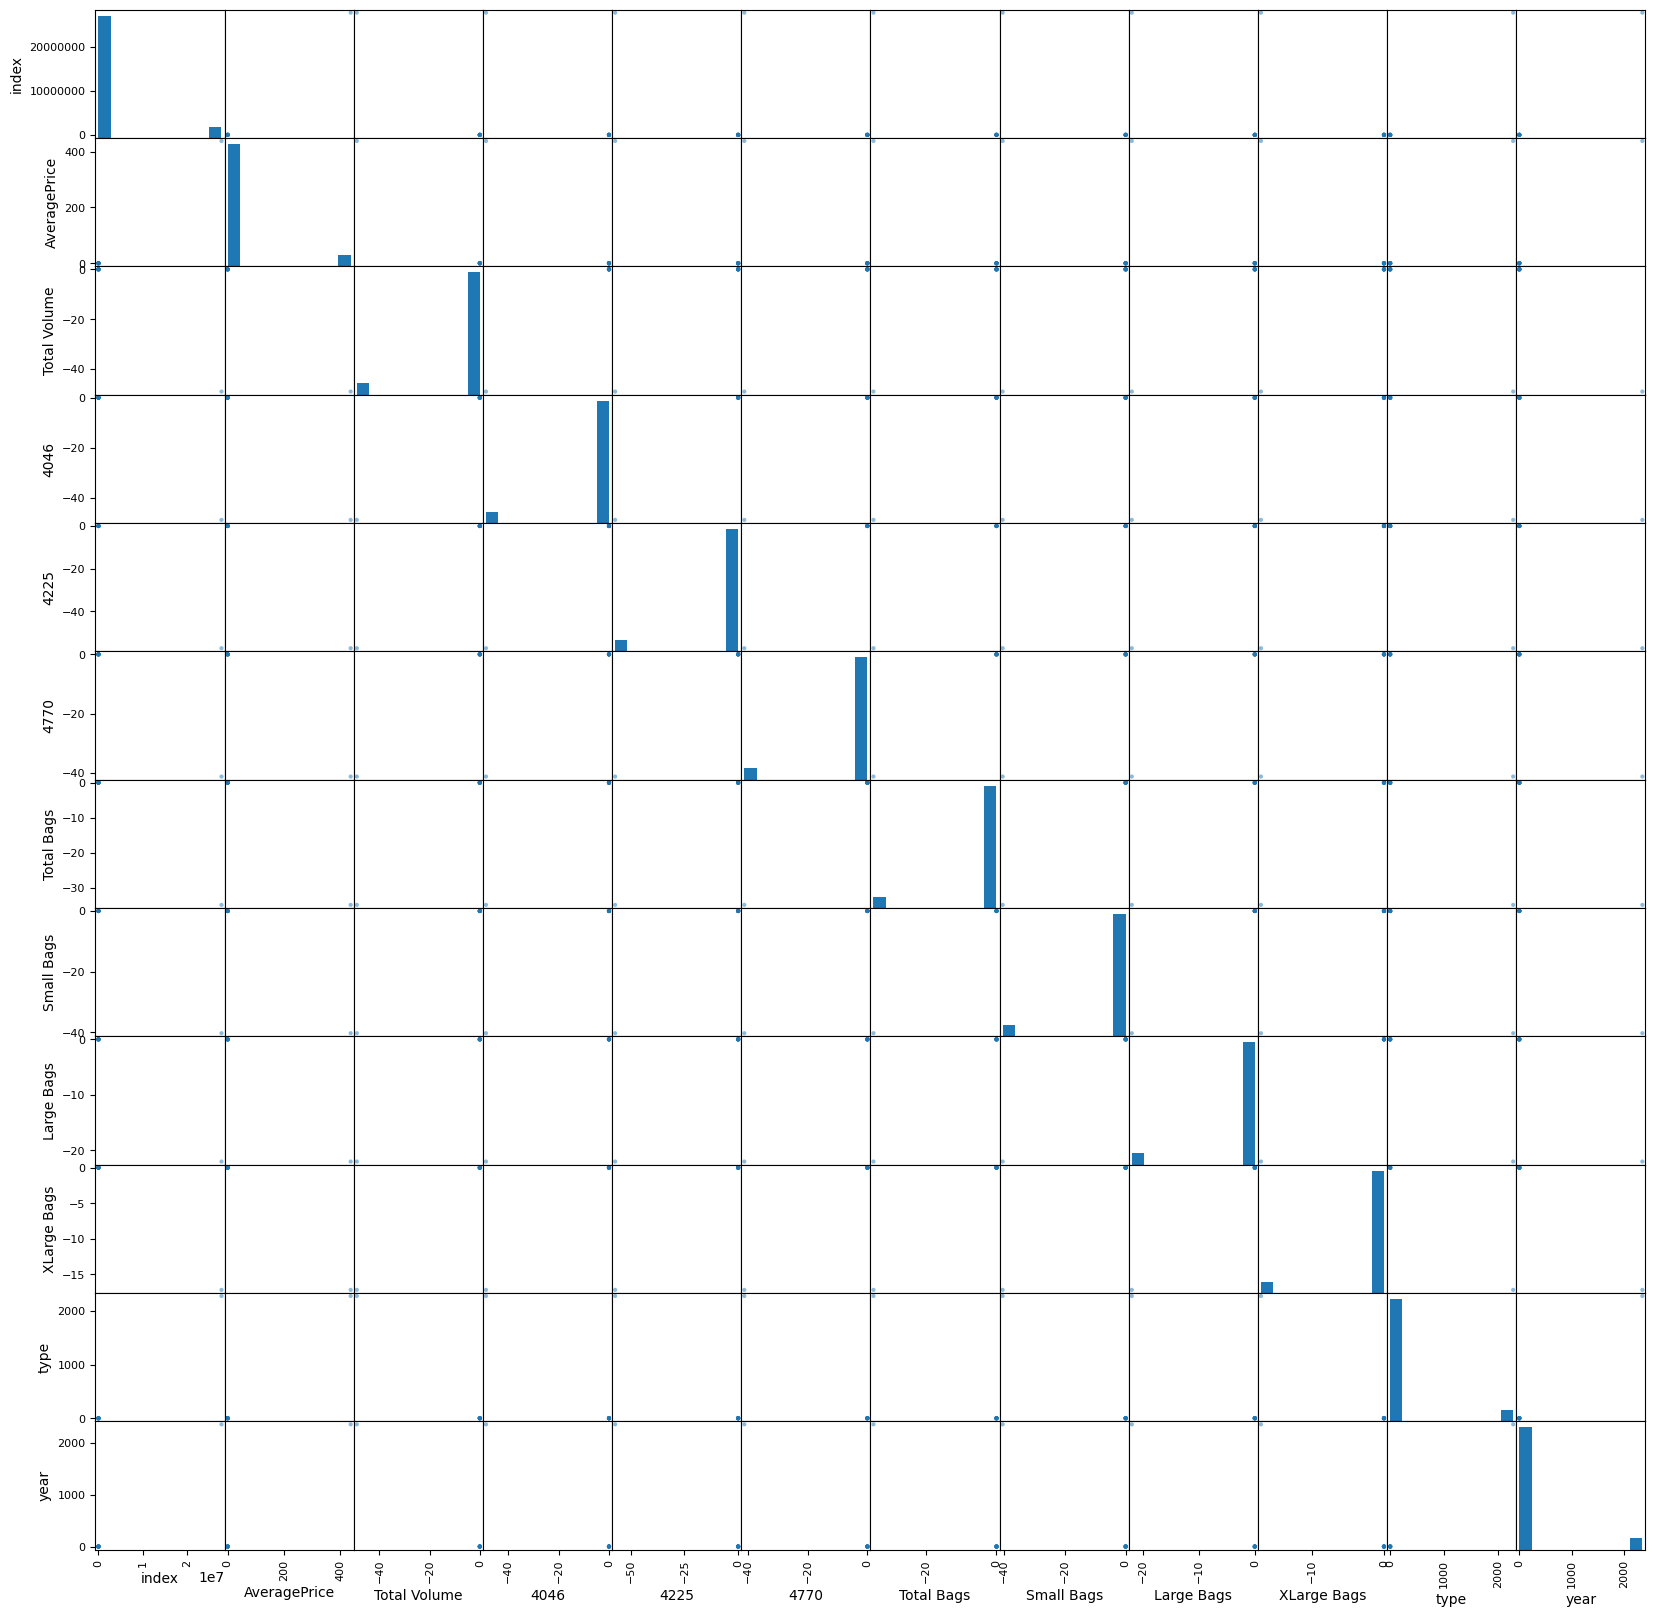

In [20]:

pd.plotting.scatter_matrix(cov_Data, figsize = (20,20))
plt.show()

# **Multivariate Analysis**

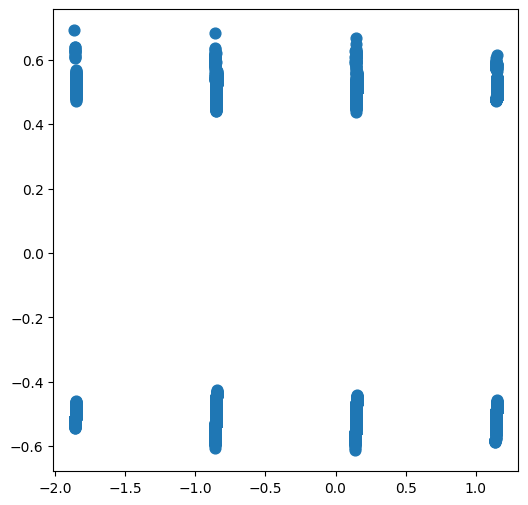

In [21]:
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
plt.scatter(data = df , x = 'PC1',y = 'PC2' , s = 60 )
plt.show()

# **Machine Learning Modeling**

### Regression models are used to predict a continuous target variable based on one or more independent variables. In this case, we are using **regression models** to predict the average price of avocados based on the other variables in the dataset such as region, type of avocado, and volume sold.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

y = data_frame['AveragePrice']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Choose a regression algorithm

# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

# Decision tree regression
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

# Random forest regression
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)




# **Evaluate the Model's Performance**

### For regression, we could use linear regression, decision trees, or random forests, and evaluate the model's performance using metrics such as mean squared error, mean absolute error, or R-squared.

In [28]:
# Select the best algorithm based on evaluation metrics

best_metrics = {'r2': -float('inf'), 'mae': float('inf'), 'mse': float('inf'), 'rmse': float('inf')}

for model, predictions, name in [(lr, lr_predictions, 'Linear Regression'),
                                 (dt, dt_predictions, 'Decision Tree Regression'),
                                 (rf, rf_predictions, 'Random Forest Regression')]:

    # Evaluation
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    # Check Best Algorithm
    if r2 > best_metrics['r2']:
        best_metrics['r2'] = r2
        best_metrics['mae'] = mae
        best_metrics['mse'] = mse
        best_metrics['rmse'] = rmse
        best_model = model
        best_name = name
        
    elif r2 == best_metrics['r2']:
        if mse < best_metrics['mse']:
            best_metrics['mae'] = mae
            best_metrics['mse'] = mse
            best_metrics['rmse'] = rmse
            best_model = model
            best_name = name
            
        elif mse == best_metrics['mse']:
            if mae < best_metrics['mae']:
                best_metrics['mae'] = mae
                best_metrics['rmse'] = rmse
                best_model = model
                best_name = name
                
            elif mae == best_metrics['mae']:
                if rmse < best_metrics['rmse']:
                    best_metrics['rmse'] = rmse
                    best_model = model
                    best_name = name

# Print Best Model 
print("Selected model:", best_name)
print("MAE:", best_metrics['mae'])
print("MSE:", best_metrics['mse'])
print("RMSE:", best_metrics['rmse'])
print("R2 score:", best_metrics['r2'])


Selected model: Random Forest Regression
MAE: 0.0013779164432313172
MSE: 2.8279854241666815e-05
RMSE: 0.0053178806155899
R2 score: 0.998615947808709



---
### The best Regression Model is Random Forest Regression
---



# **Visualize the results of best Model**

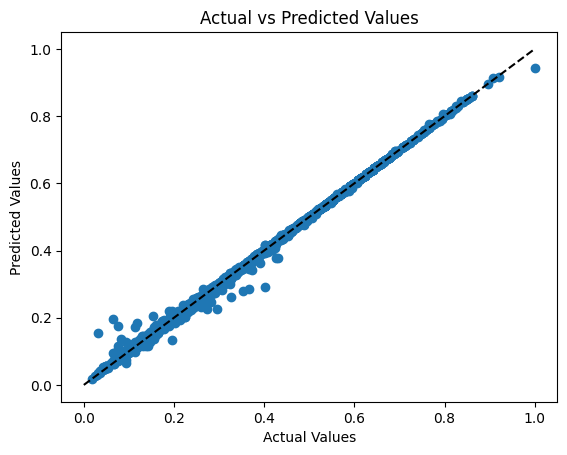

In [29]:
import matplotlib.pyplot as plt

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], '--k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# **Refine the Model**

### Refine the model as needed: This involves tweaking the hyperparameters of the algorithm, selecting or removing features, or applying ensemble methods to improve the performance of the model.

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Use the best model to make predictions on the testing data
y_pred = grid_search.predict(X_test)

# Calculate the evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R2 score: 0.9984500755163659
MAE: 0.0013985472627116497
MSE: 3.1669064764010735e-05
RMSE: 0.0056275274112180685


---
### Now I have built and evaluated the regression models, you can use it to make predictions on new data and assess the accuracy of the predictions. 😀
---